In [5]:
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import tensorflow as tf
import seaborn as sns

In [6]:
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [7]:
test_set_path = r"C:\Users\BrunoLuciano\OneDrive - ITS Angelo Rizzoli\Documents\Deep_learning_project\Data\Test_set"
model_path = r'C:\Users\BrunoLuciano\OneDrive - ITS Angelo Rizzoli\Documents\Deep_learning_project\model\lego.keras'

In [8]:
image_size = (300, 300)
batch_size = 32

In [9]:
 
datagen_2 = ImageDataGenerator(rescale=1./255)   

In [10]:
test_set = datagen_2.flow_from_directory(
        directory=test_set_path,
        class_mode='categorical',
        color_mode="grayscale",
        target_size=image_size,
        batch_size=batch_size,
        shuffle=False,
        seed=42,
        interpolation="bilinear"
    )
    

Found 12000 images belonging to 50 classes.


In [11]:
model = load_model(model_path)

In [12]:

y_hat_pre = model.predict(test_set)
y_hat = np.argmax(y_hat_pre, axis=1)

y_true = test_set.classes

loss, accuracy = model.evaluate(test_set)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

375/375 [==============================] - 153s 407ms/step - loss: 1.2565 - accuracy: 0.5758
Loss: 1.2565363645553589
Accuracy: 0.5758333206176758


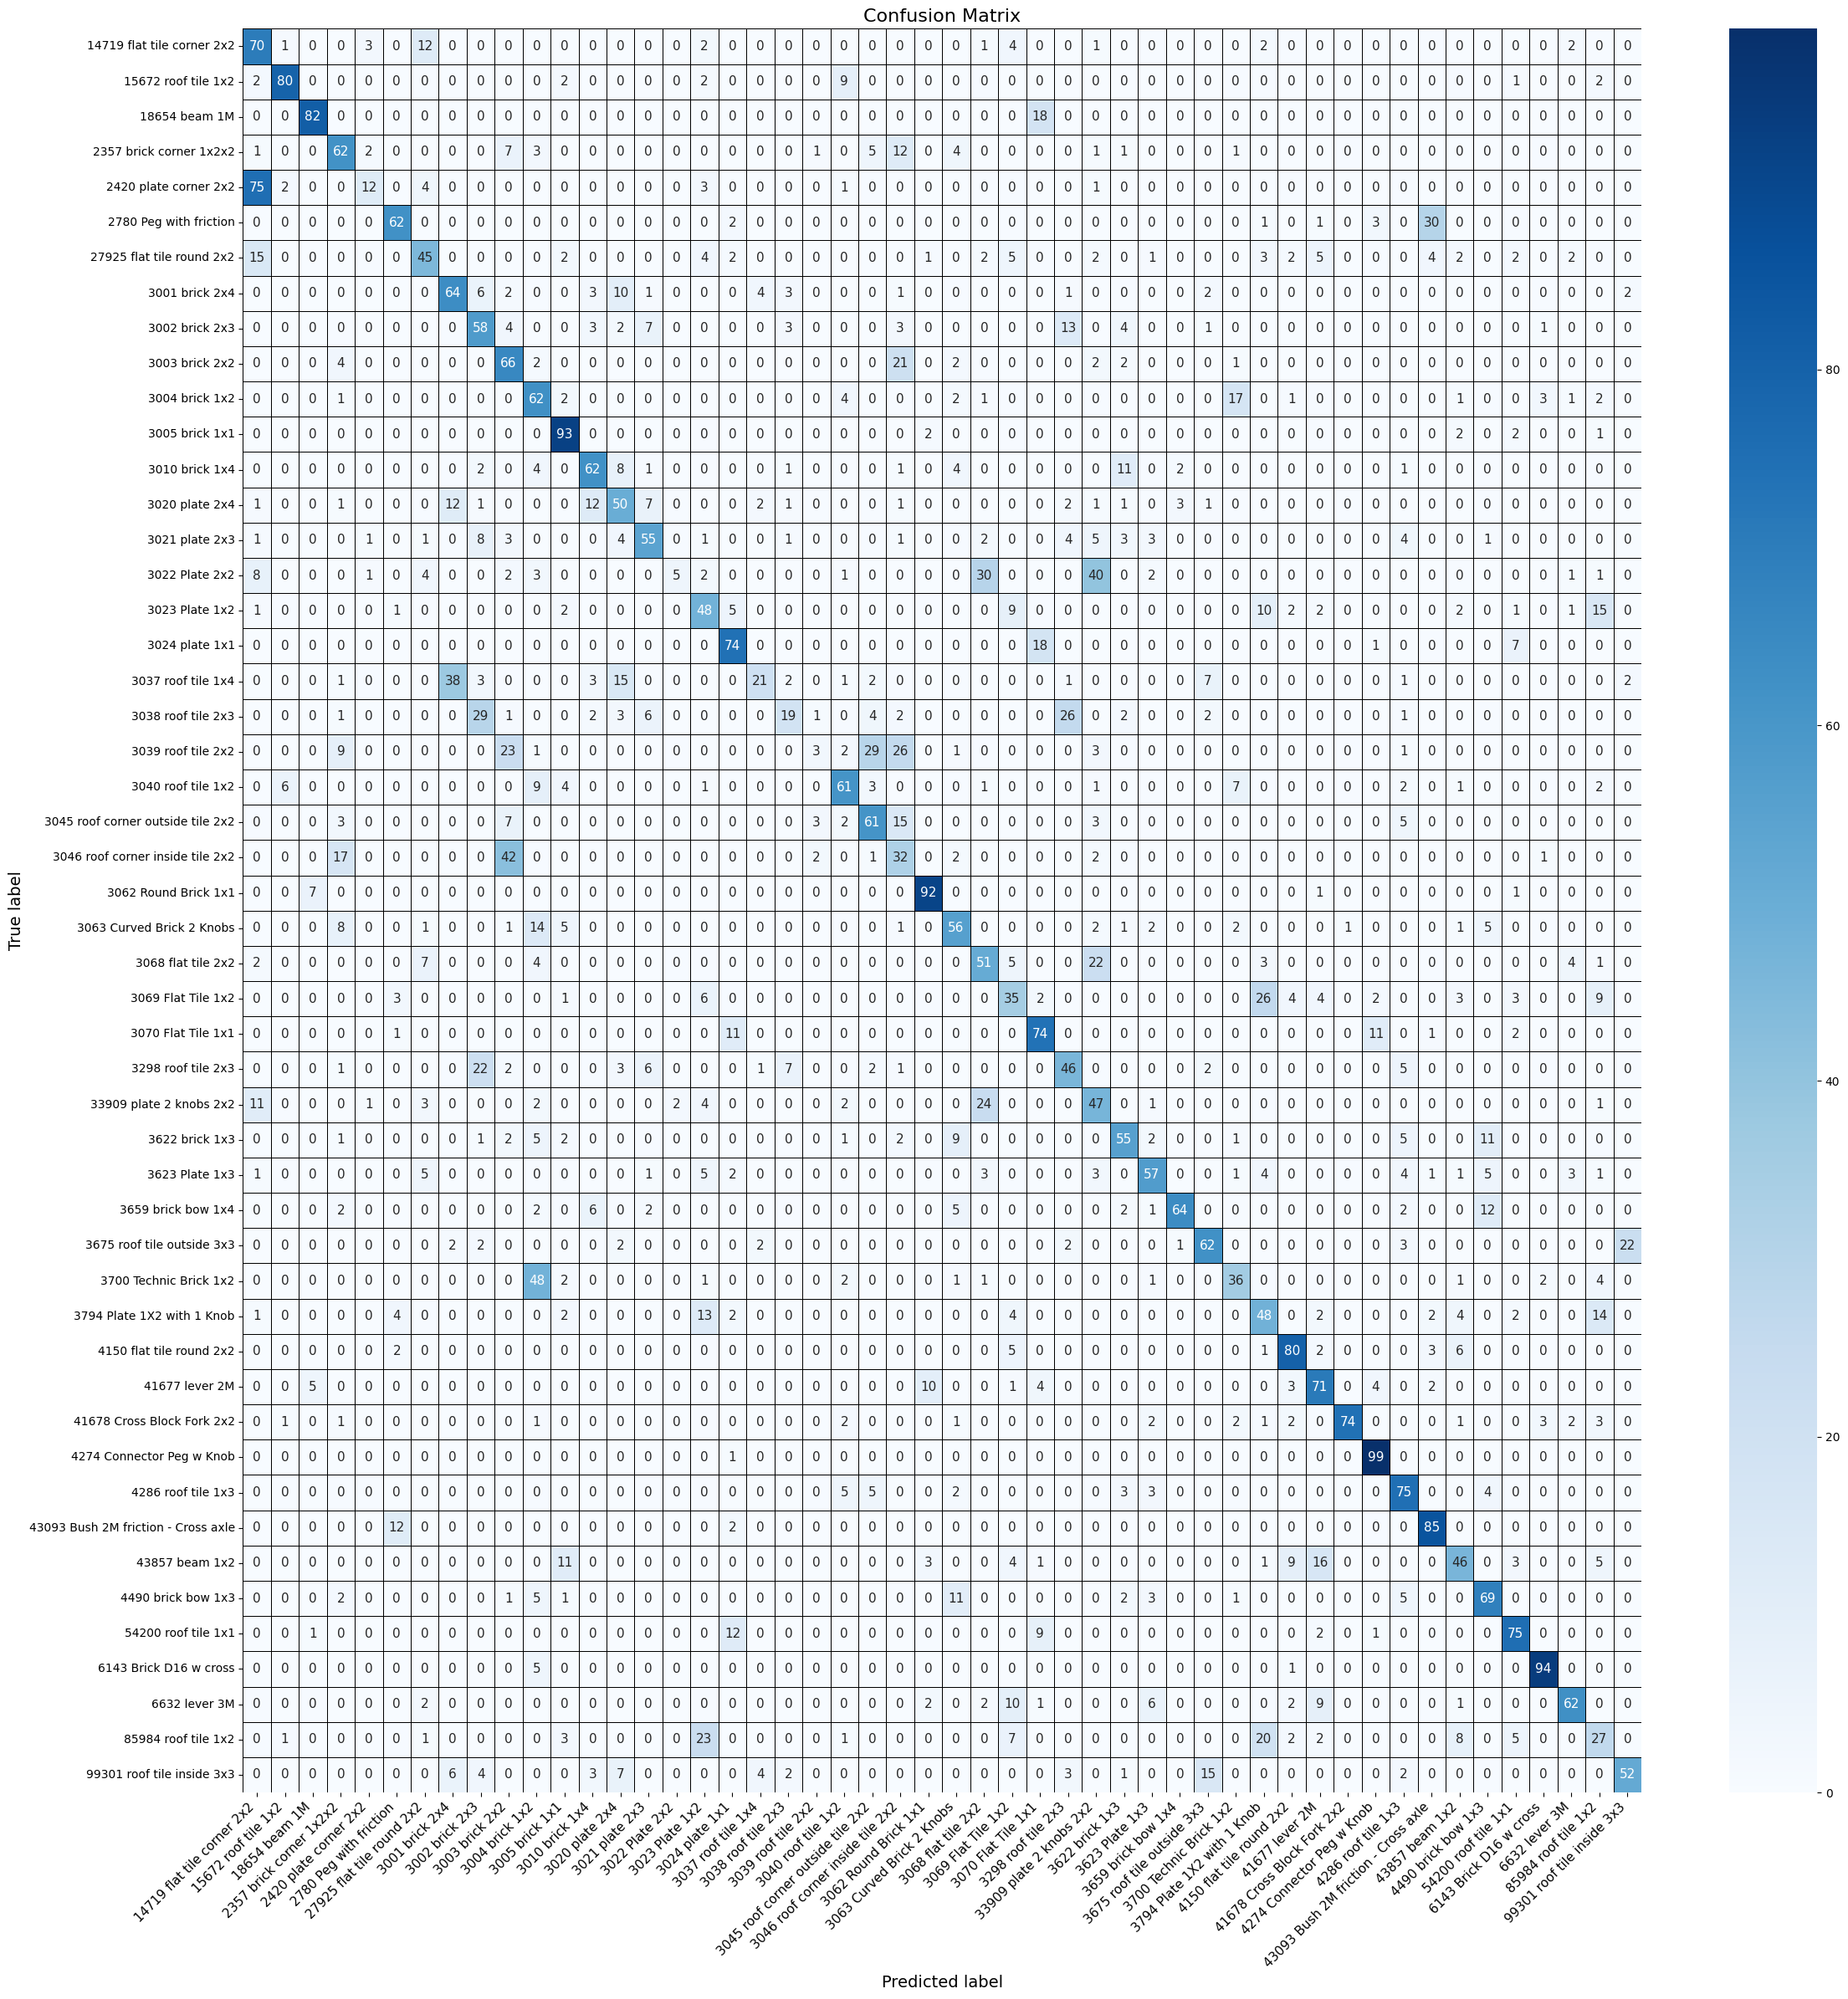

In [121]:

# Calcola la matrice di confusione
cm = confusion_matrix(y_true, y_hat)

# Normalizza la matrice di confusione
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Moltiplicare ogni numero per 100 per ottenere le percentuali
cm_percent = cm_normalized * 100

# Etichette delle classi
class_labels = list(test_set.class_indices.keys())


# Crea la heatmap
plt.figure(figsize=(24, 24))
ax = sns.heatmap(cm_percent, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels,
                fmt='.0f', annot_kws={"size": 11}, linewidths=0.5, linecolor='black')

# Impostazioni per migliorare la leggibilità delle etichette sull'asse x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=11, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.tight_layout()
plt.show()




In [122]:
images, true_labels = next(test_set)


In [123]:
# Limitiamo il numero di immagini a 20
num_images = min(len(images), 20)

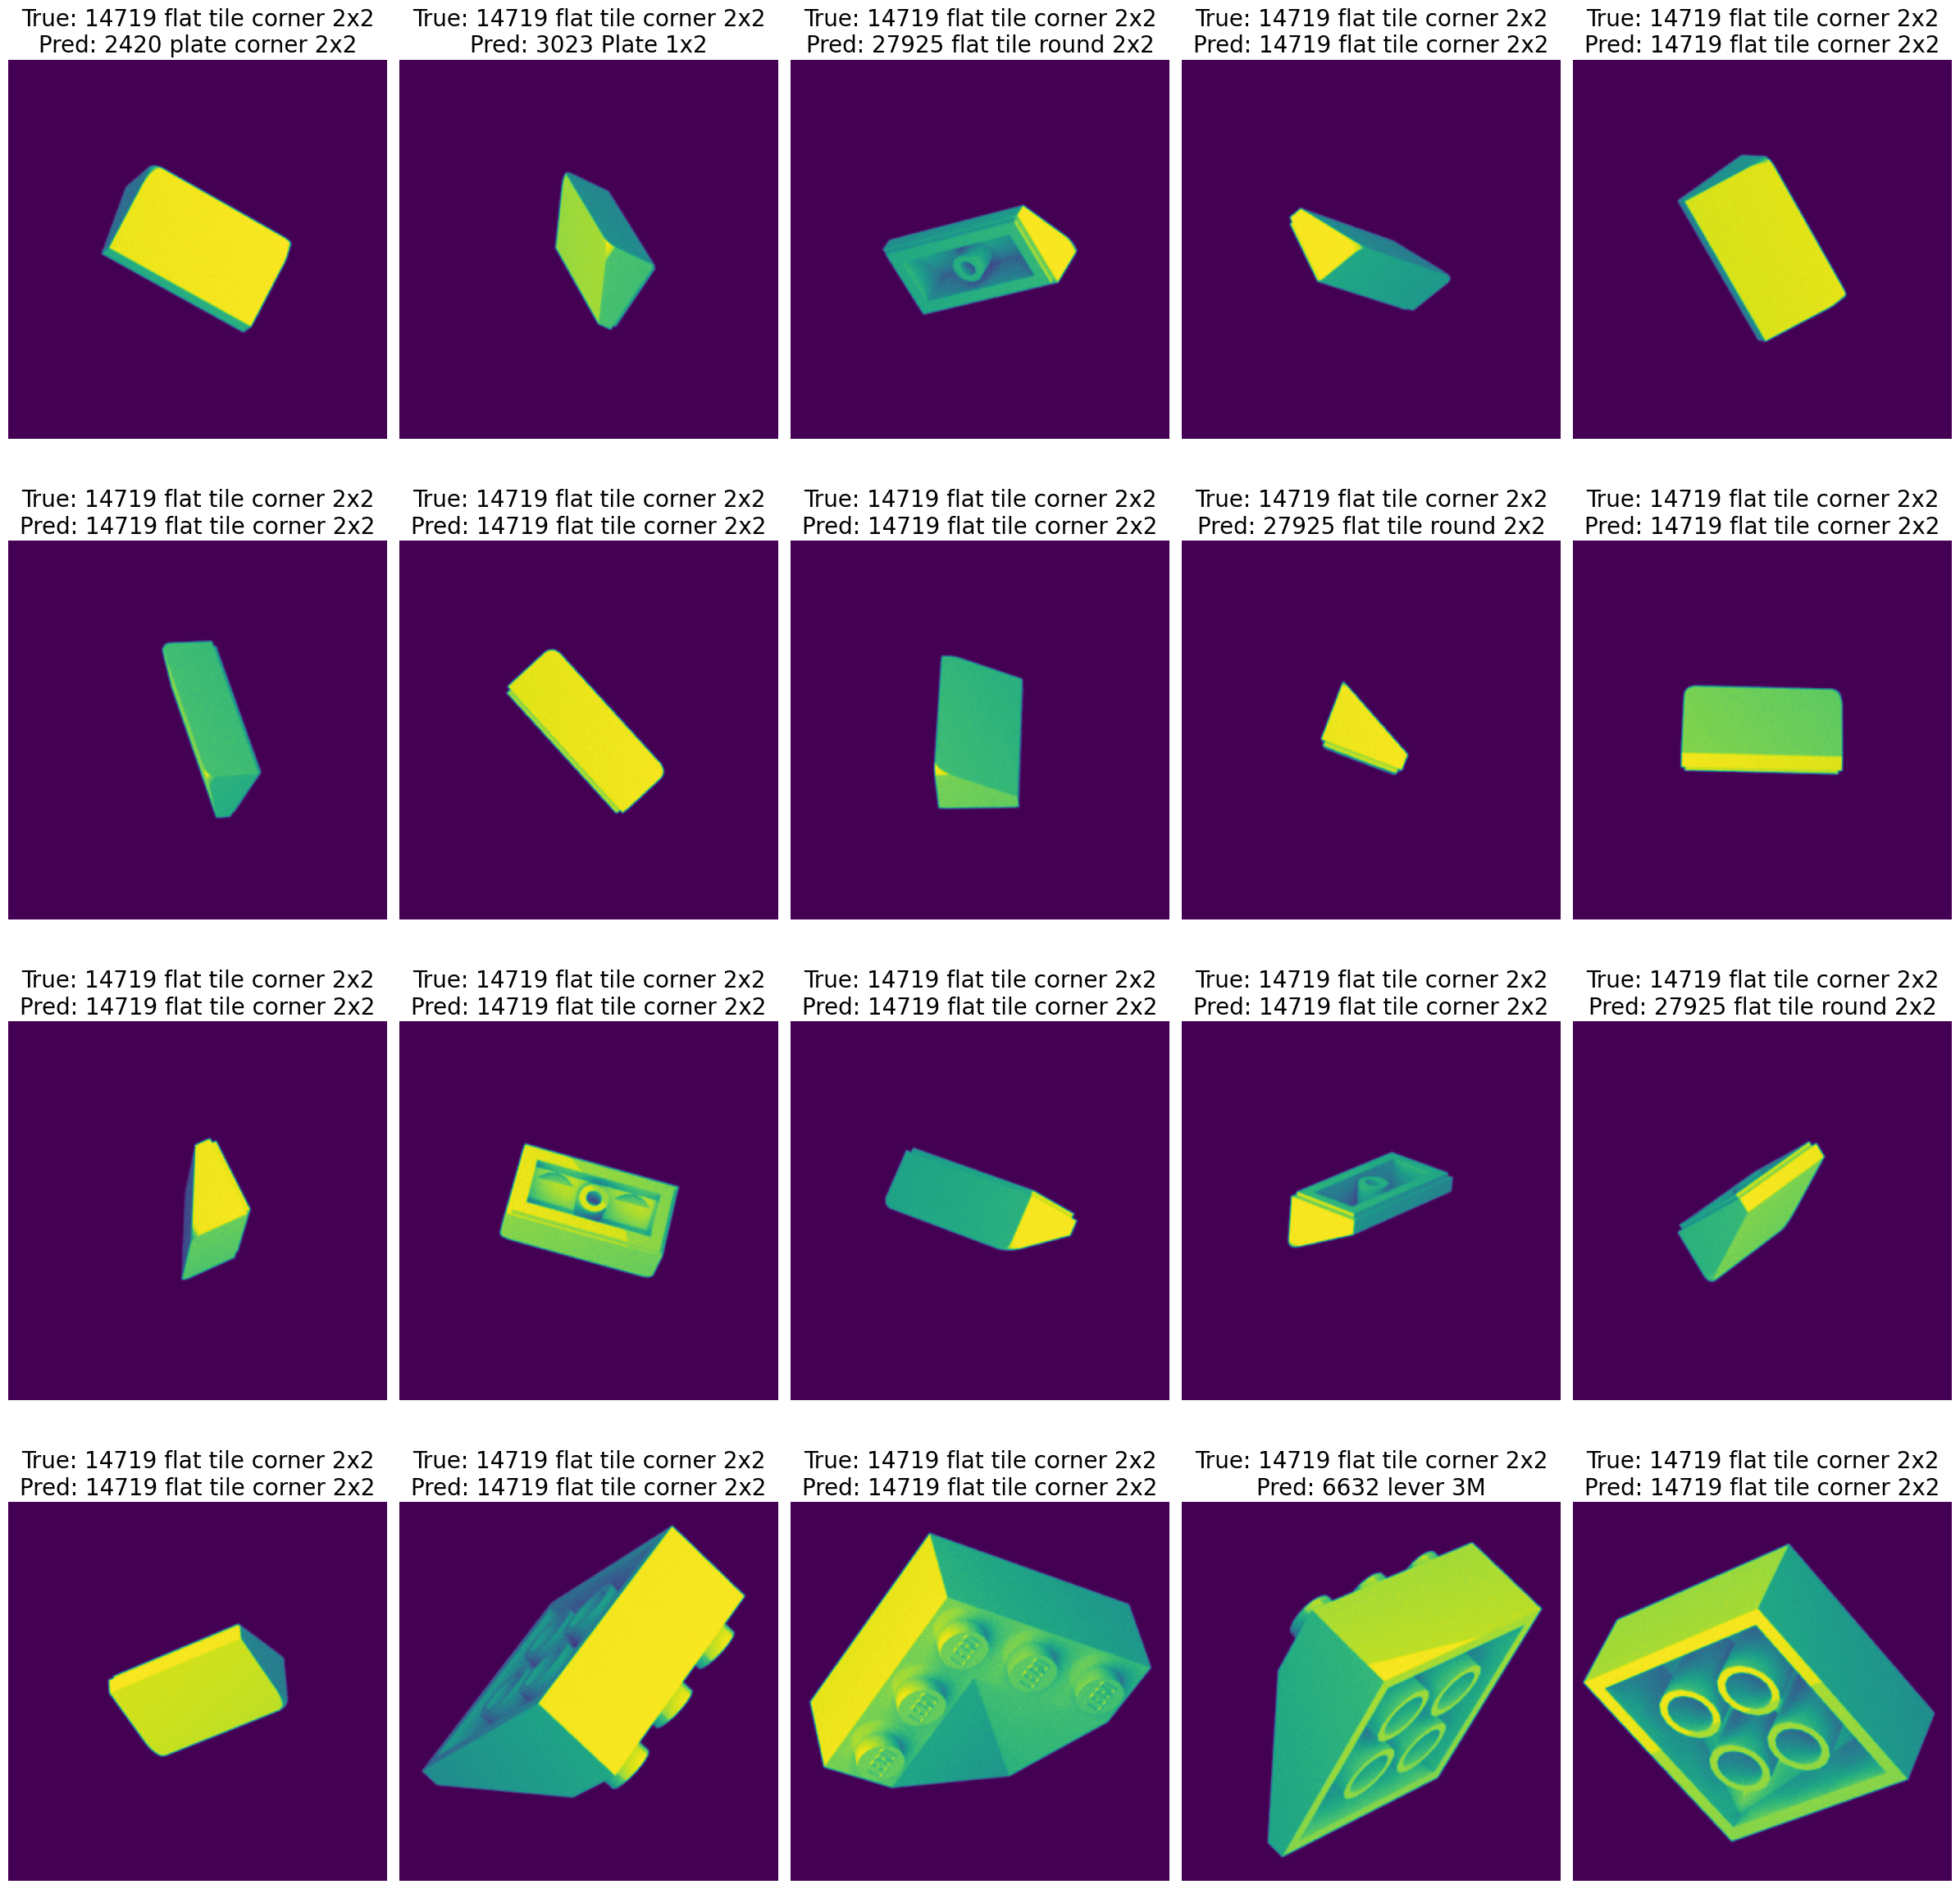

In [124]:
# Visualizziamo le immagini con le etichette vere e predette
def plot_images(images, true_labels, predicted_labels, class_names, num_images):
    plt.figure(figsize=(24, 24))
    for i in range(num_images):
        plt.subplot(4, 5, i + 1)
        plt.imshow(images[i])
        true_label = class_names[true_labels[i]]
        predicted_label = class_names[predicted_labels[i]]
        plt.title(f'True: {true_label}\nPred: {predicted_label}',fontsize=20)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Chiamiamo la funzione per mostrare le immagini
plot_images(images, y_true, y_hat, class_labels, num_images)